**[Clustering](https://scikit-learn.org/stable/modules/clustering.html)**

Clusteranalyse oder Clustering ist eine unbeaufsichtigte maschinelle Lernaufgabe.
Jeder Clustering-Algorithmus enthält zwei Komponenten: eine Klasse mit der ``fit``-Methode, um die Cluster aus Trainingsdaten zu lernen und eine Funktion, die bei gegebenen Trainingsdaten, ein Array von Ganzzahlbezeichnungen zurückgibt, die den verschiedenen Clustern entsprechen. Die Klasse enthält das Attribut ``labels_``, in dem die cluster Bezeichnungen gespeichert sind.

Es gibt viele Arten von Clustering-Algorithmen.<br>
Viele Algorithmen verwenden Ähnlichkeits- oder Abstandsmaße zwischen Beispielen im Merkmalsraum, um dichte Beobachtungsbereiche zu entdecken. Daher ist es häufig empfehlenswert, Daten vor der Verwendung von Clustering-Algorithmen zu skalieren.
Die Scikit-Learn-Bibliothek bietet eine Reihe verschiedener [Clustering-Algorithmen](https://scikit-learn.org/stable/modules/clustering.html) zur Auswahl.

Eine Liste von 5 der beliebtesten Algorithmen mit Beispielcode:

- [Agglomerative Clustering](#aggleromative)
- [DBSCAN](#dbscan)
- [K-Mittel](#kmeans)
- [Mischung der Gaußschen](#gmm)
- [KNeighborsClassifier](#knclf)

Jeder Algorithmus bietet einen anderen Ansatz für die Herausforderung, natürliche Gruppen in Daten zu entdecken.
<hr>

<a id="agglomerative"> **Agglomeratives Clustering** </a>

**Beispiel für agglomeratives Clustering**:.<br>
Demonstration des agglomerativen Clustering-Algorithmus mit Daten aus den Beispieldatensätzen [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) und [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs).

häufigster Parameter für agglomeratives Clustering:
- 'nCLusters': $\quad$ n_Clusters, ``int`` oder ``None``, default = 2<br>$\quad$ Die Anzahl der zu findenden Cluster. Es muss ``None`` sein, wenn ``distance_threshold`` ungleich ``None``.

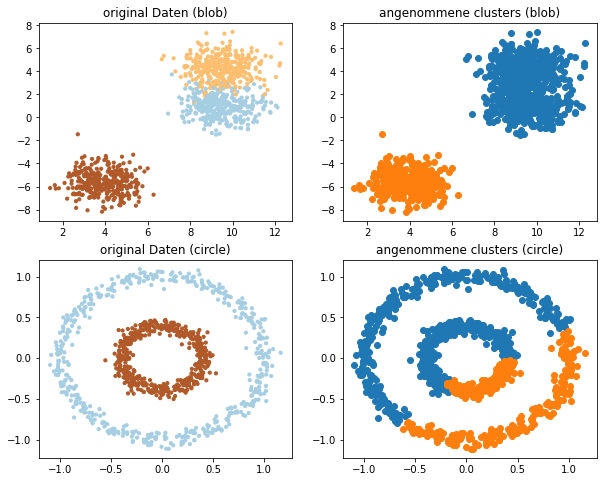

In [1]:
# Resourcen
from numpy import unique, arange, where
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
#
# ----------------------------------------------------------------------------
# Datensätze generieren
#
Xb, yb = make_blobs(n_samples=1000, n_features=2, centers=None, random_state=4)
Xc, yc = make_circles(n_samples=1000, factor=0.4, noise=0.05)
#
# ----------------------------------------------------------------------------
# Instanz des Algorithmus definieren:
#
nClusters = 2
#
model = AgglomerativeClustering(n_clusters=nClusters)
#
# Model mit Daten füttern und Vorhersagen treffen
# - make_blob Datensatz:
blob_yhat = model.fit_predict(Xb)
# - make_circle Datensatz:
circle_yhat = model.fit_predict(Xc)
#
# einzelne Elemente in den vorbestimmten Daten ermitteln
blobClusters = unique(blob_yhat)
circleClusters = unique(circle_yhat)
#
# scatter plots for jeden Datensatz und deren gefundenen Cluster
#
figAgglo, axes = pyplot.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0,0].clear()
axes[0,1].clear()
axes[1,0].clear()
axes[1,1].clear()
    
axes[0,0].set_title("original Daten (blob)")
axes[1,0].set_title("original Daten (circle)")
axes[0,1].set_title("angenommene clusters (blob)")
axes[1,1].set_title("angenommene clusters (circle)")
        
axes[0,0].scatter(Xb[:, 0], Xb[:, 1], s=10, c=yb, cmap=pyplot.cm.Paired)
axes[1,0].scatter(Xc[:, 0], Xc[:, 1], s=10, c=yc, cmap=pyplot.cm.Paired)

for cluster in blobClusters:
    # Zeilenindizes für Stichproben mit diesem Cluster erhalten
    row_ix = where(blob_yhat == cluster)
    # scatter plot dieses Datensatzes erzeugen
    axes[0,1].scatter(Xb[row_ix[0], 0], Xb[row_ix[0], 1])
#  
for cluster in circleClusters:
    # Zeilenindizes für Stichproben mit diesem Cluster erhalten
    row_ix = where(circle_yhat == cluster)
    # scatter plot dieses Datensatzes erzeugen
    axes[1,1].scatter(Xc[row_ix[0], 0], Xc[row_ix[0], 1])
#

<a id="dbscan"> **DBSCAN** </a>

<a id="">Beispiel für DBSCAN clustering</a>

Demonstration des [DBSCAN-Clustering-Algorithmus](https://scikit-learn.org/stable/modules/clustering.html#dbscan) mit Beispieldatensätzen [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) und [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs).

Parameter: <br>
[DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN):
- eps = 0,3: $\quad$ Der maximale Abstand zwischen zwei Stichproben, von denen eine als in der Nähe der anderen betrachtet werden soll. Dies ist keine maximale Grenze für die Entfernung von Punkten innerhalb eines Clusters. Dies ist der wichtigste DBSCAN-Parameter, den man für einen Datensatz und dessen Entfernungsfunktion auswählen kann.
- min _samples = 8: $\quad$ Die Anzahl der Stichproben (oder das Gesamtgewicht) in einer Nachbarschaft für einen Punkt, der als Kernpunkt betrachtet werden soll. Dies schließt den Punkt selbst ein.

[make_blob](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=make_blobs#sklearn.datasets.make_blobs):
- n_Stichproben = 1000 $\quad$ Gesamtzahl der Punkte, die gleichmäßig auf die Cluster verteilt sind.
- rnd_state = 4 $\qquad$ Bestimmt die Zufallszahlengenerierung für die Datensatzerstellung. Übergeben Sie ein ``int`` für die reproduzierbare Ausgabe über mehrere Funktionsaufrufe.
- n_features = 2 $\quad$Anzahl der Features für jede Stichprobe.

[make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles):
- n_samples = 1000 $\quad$ Gesamtzahl der generierten Punkte.
- Rauschen = 0,1 $\qquad$ Standardabweichung des zu den Daten hinzugefügten Gaußschen Rauschens.
- Faktor = 0,4 $\qquad$Skalierungsfaktor zwischen innerem und äußerem Kreis. ``0<factor<1``

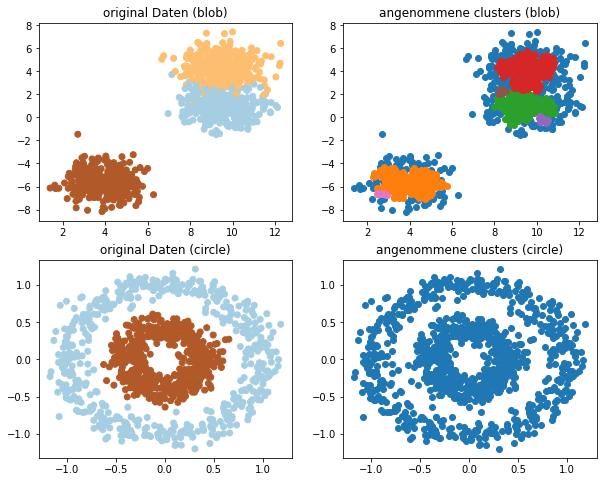

In [2]:
# Resourcen
#
from numpy import unique, arange, where
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
#
#-----------------------------------------------------------------------------
# Datensätze erzeugen
Xb, yb = make_blobs(n_samples=1000, n_features=2, random_state=4)
Xc, yc = make_circles(n_samples=1000, factor=0.4, noise=0.1)
#
#-----------------------------------------------------------------------------
#
eps = 0.3
minSamples = 8
#
model = DBSCAN(eps=eps, min_samples=minSamples)
#
# Model mit Daten füttern und Vorhersagen treffen
#
blob_yhat = model.fit_predict(Xb)
#
circle_yhat = model.fit_predict(Xc)
#
# einzelne Elemente in den vorbestimmten Daten ermitteln
blobClusters = unique(blob_yhat)
circleClusters = unique(circle_yhat)
#
# scatter plots for jeden Datensatz und deren gefundenen Cluster
#
figDBSCAN, axes = pyplot.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0,0].clear()
axes[0,1].clear()
axes[1,0].clear()
axes[1,1].clear()
    
axes[0,0].set_title("original Daten (blob)")
axes[1,0].set_title("original Daten (circle)")
axes[0,1].set_title("angenommene clusters (blob)")
axes[1,1].set_title("angenommene clusters (circle)")
        
axes[0,0].scatter(Xb[:, 0], Xb[:, 1], c=yb, cmap=pyplot.cm.Paired)
axes[1,0].scatter(Xc[:, 0], Xc[:, 1], c=yc, cmap=pyplot.cm.Paired)

for cluster in blobClusters:
    # Zeilenindizes für Stichproben mit diesem Cluster erhalten
    row_ix = where(blob_yhat == cluster)
    # scatter plot dieses Datensatzes erzeugen
    axes[0,1].scatter(Xb[row_ix, 0], Xb[row_ix, 1])
#  
for cluster in circleClusters:
    # Zeilenindizes für Stichproben mit diesem Cluster erhalten
    row_ix = where(circle_yhat == cluster)
    # scatter plot dieses Datensatzes erzeugen
    axes[1,1].scatter(Xc[row_ix, 0], Xc[row_ix, 1])
#  

<a id="kmeans"> **K-Means** </a><br>
**Beispiel für K-Means-Clustering**

Demonstration des [K-Means-Clustering-Algorithmus](https://scikit-learn.org/stable/modules/clustering.html#k-means) mit Beispieldatensätzen [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) und [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs).

Parameter: <br>
[K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans):
- nCLusters = 4 $\quad$ Die Anzahl der zu bildenden Cluster sowie die Anzahl der zu generierenden Zentroide.

[make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs):
- n_Samples = 1000 $\quad$Gesamtzahl der Punkte, die gleichmäßig auf die Cluster verteilt sind.
- rnd_state = 4 $\quad$ Bestimmt die Zufallszahlengenerierung für die Datensatzerstellung. Übergeben Sie ein ``int`` für die reproduzierbare Ausgabe über mehrere Funktionsaufrufe.
- n_features = 2 $\quad$Anzahl der Features für jede Stichprobe.

[make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles):
- n_ Samples = 1000 $\quad$ Gesamtzahl der generierten Punkte.
- Rauschen = 0,1 $\qquad$ Standardabweichung des zu den Daten hinzugefügten Gaußschen Rauschens.
- Faktor = 0,4 $\qquad$Skalierungsfaktor zwischen innerem und äußerem Kreis. ``0<factor<1``

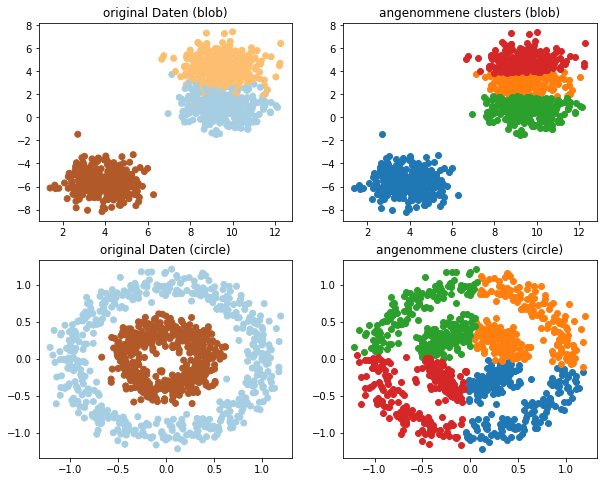

In [3]:
# Resourcen:
#
from numpy import unique, arange, where
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot
#
#-----------------------------------------------------------------------------
# Datensätze erzeugen
#
Xb, yb = make_blobs(n_samples=1000, n_features=2, centers=None, random_state=4)
Xc, yc = make_circles(n_samples=1000, factor=0.4, noise=0.1)
#
#-----------------------------------------------------------------------------
nClusters = 4
#
model = KMeans(n_clusters = nClusters)
#
# Model mit Daten füttern und Vorhersagen treffen
# - make_blob Datensatz:
blob_yhat = model.fit_predict(Xb)
# - make_circle Datensatz:
circle_yhat = model.fit_predict(Xc)
#
#
blobClusters = unique(blob_yhat)
circleClusters = unique(circle_yhat)
#
# scatter plots für jeden Datensatz mit dem jeweiligen Cluster erstellen
#
figKMeans, axes = pyplot.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0,0].clear()
axes[0,1].clear()
axes[1,0].clear()
axes[1,1].clear()
    
axes[0,0].set_title("original Daten (blob)")
axes[1,0].set_title("original Daten (circle)")
axes[0,1].set_title("angenommene clusters (blob)")
axes[1,1].set_title("angenommene clusters (circle)")
        
axes[0,0].scatter(Xb[:, 0], Xb[:, 1], c=yb, cmap=pyplot.cm.Paired)
axes[1,0].scatter(Xc[:, 0], Xc[:, 1], c=yc, cmap=pyplot.cm.Paired)

for cluster in blobClusters:
    # Zeilenindizes für Stichproben mit diesem Cluster erhalten
    row_ix = where(blob_yhat == cluster)
    # scatter plot dieses Datensatzes erzeugen
    axes[0,1].scatter(Xb[row_ix, 0], Xb[row_ix, 1])
#  
for cluster in circleClusters:
    # Zeilenindizes für Stichproben mit diesem Cluster erhalten
    row_ix = where(circle_yhat == cluster)
    # scatter plot dieses Datensatzes erzeugen
    axes[1,1].scatter(Xc[row_ix, 0], Xc[row_ix, 1])


<a id="gmm"> **Beispiel eines Gaußschen Mischverteilungsmodells** </a>

Demonstration des [Gaußschen Mischverteilungsmodells-Algorithmus](https://scikit-learn.org/stable/modules/mixture.html#gmm) mit Beispieldatensätzen [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) und [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs).

Parameter: <br>
[Gaußsches Mischverteilungsmodells](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture):
- n _Komponenten = 6: $\quad$ Die Anzahl der Mischungskomponenten.

[make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs):
- n_Samples = 1000 $\quad$ Gesamtzahl der Punkte, die gleichmäßig auf die Cluster verteilt sind.
- rnd_state = 4 $\quad$ Bestimmt die Zufallszahlengenerierung für die Datensatzerstellung. Übergeben Sie ein ``int`` für die reproduzierbare Ausgabe über mehrere Funktionsaufrufe.
- n_features = 2 $\quad$Anzahl der Features für jede Stichprobe.

[make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles):
- n_ Samples = 1000 $\quad$ Gesamtzahl der generierten Punkte.
- Rauschen = 0,1 $\qquad$ Standardabweichung des zu den Daten hinzugefügten Gaußschen Rauschens.
- Faktor = 0,4 $\qquad$Skalierungsfaktor zwischen innerem und äußerem Kreis. ``0<factor<1``

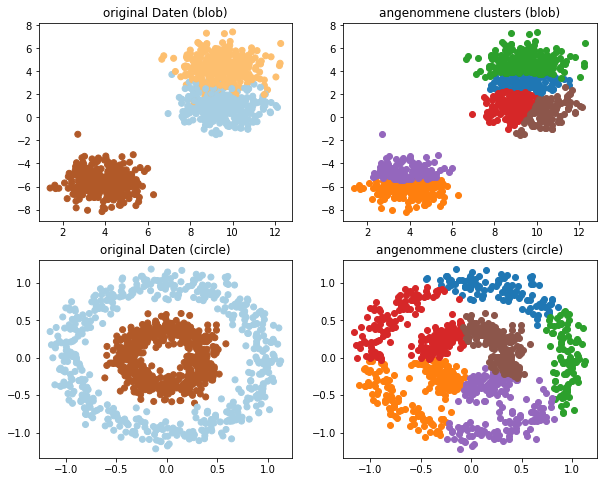

In [4]:
# Resourcen
#
from numpy import unique, arange, where
from sklearn.datasets import make_circles, make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
#
#-----------------------------------------------------------------------------
#
# Datensätze generieren
Xb, yb = make_blobs(n_samples=1000, n_features=2, centers=None, random_state=4)
Xc, yc = make_circles(n_samples=1000, factor=0.4, noise=0.1)
#
# model definieren
#
nComponents = 6
model = GaussianMixture(n_components = nComponents)
#
# Model mit Daten füttern und Vorhersagen treffen
# - make_blob Datensatz:
blob_yhat = model.fit_predict(Xb)
# - make_circle Datensatz:
circle_yhat = model.fit_predict(Xc)
#
#
blobClusters = unique(blob_yhat)
circleClusters = unique(circle_yhat)
#
# scatter plots für jeden Datensatz mit den Clustern ezrugen
#
figKMeans, axes = pyplot.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0,0].clear()
axes[0,1].clear()
axes[1,0].clear()
axes[1,1].clear()
    
axes[0,0].set_title("original Daten (blob)")
axes[1,0].set_title("original Daten (circle)")
axes[0,1].set_title("angenommene clusters (blob)")
axes[1,1].set_title("angenommene clusters (circle)")
#
# plot original daten
axes[0,0].scatter(Xb[:, 0], Xb[:, 1], c=yb, cmap=pyplot.cm.Paired)
axes[1,0].scatter(Xc[:, 0], Xc[:, 1], c=yc, cmap=pyplot.cm.Paired)

for cluster in blobClusters:
    # Zeilenindizes für Stichproben mit diesem Cluster erhalten
    row_ix = where(blob_yhat == cluster)
    # scatter plot dieses Datensatzes erzeugen
    axes[0,1].scatter(Xb[row_ix, 0], Xb[row_ix, 1])
#  
for cluster in circleClusters:
    # Zeilenindizes für Stichproben mit diesem Cluster erhalten
    row_ix = where(circle_yhat == cluster)
    # scatter plot dieses Datensatzes erzeugen
    axes[1,1].scatter(Xc[row_ix, 0], Xc[row_ix, 1])
#  

<a id="knclf"> **Beispiel KNeighboursClassifier** </a>

Zeigen Sie den [KNeighborsClassifier-Clustering-Algorithmus](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) mit Beispieldatensätzen [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) und [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs).

Parameter: <br>
[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier):
- n _Nachbarn: $\quad$ Anzahl der Nachbarn, die standardmäßig für k-neighbors abfragen verwendet werden.

[make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs):
- n_Samples = 1000 $\quad$ Gesamtzahl der Punkte, die gleichmäßig auf die Cluster verteilt sind.
- rnd_state = 4 $\qquad$ Bestimmt die Zufallszahlengenerierung für die Datensatzerstellung. Übergeben Sie ein ``int`` für die reproduzierbare Ausgabe über mehrere Funktionsaufrufe.
- n_features = 2 $\qquad$Anzahl der Features für jede Stichprobe.

[make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles):
- n_samples = 1000 $\quad$ Gesamtzahl der generierten Punkte.
- Rauschen = 0,1 $\qquad$ Standardabweichung des zu den Daten hinzugefügten Gaußschen Rauschens.
- Faktor = 0,4 $\qquad$Skalierungsfaktor zwischen innerem und äußerem Kreis. ``0<factor<1``

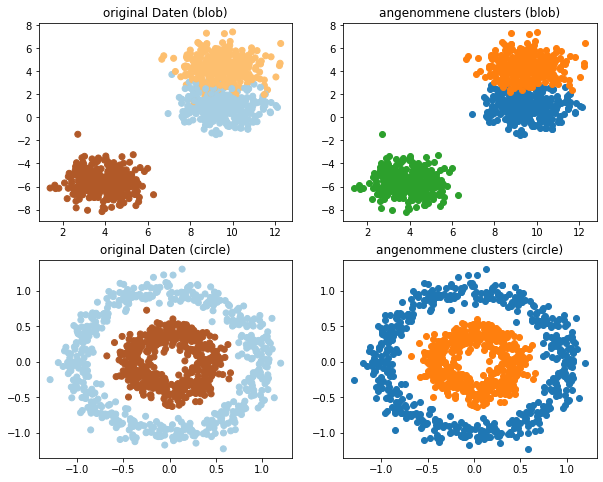

In [5]:
# Resourcen
#
from numpy import unique, arange, where
from sklearn.datasets import make_circles, make_blobs
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
#------------------------------------------------------------------
#
# Datensätze generieren
Xb, Yb = make_blobs(n_samples=1000, n_features=2, centers=None, random_state=4)
Xc, Yc = make_circles(n_samples=1000, factor=0.4, noise=0.1)
#
#
nNeighbors = 5
#
model= KNeighborsClassifier(n_neighbors = nNeighbors)
#
# fit model and predict clusters
model.fit(Xb,Yb)
#
blob_yhat = model.predict(Xb)
# - make_circle dataset:
model.fit(Xc,Yc)
circle_yhat = model.predict(Xc)
#
#
blobClusters = unique(blob_yhat)
circleClusters = unique(circle_yhat)
#
# scatter plots für jeden Datensatz und deren Cluster
#
figKMeans, axes = pyplot.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0,0].clear()
axes[0,1].clear()
axes[1,0].clear()
axes[1,1].clear()
    
axes[0,0].set_title("original Daten (blob)")
axes[1,0].set_title("original Daten (circle)")
axes[0,1].set_title("angenommene clusters (blob)")
axes[1,1].set_title("angenommene clusters (circle)")
        
# original datensatz plotten
axes[0,0].scatter(Xb[:, 0], Xb[:, 1], c=Yb, cmap=pyplot.cm.Paired)
axes[1,0].scatter(Xc[:, 0], Xc[:, 1], c=Yc, cmap=pyplot.cm.Paired)

for cluster in blobClusters:
    # Zeilenindizes für Stichproben mit diesem Cluster erhalten
    row_ix = where(blob_yhat == cluster)
    # scatter plot dieses Datensatzes erzeugen
    axes[0,1].scatter(Xb[row_ix, 0], Xb[row_ix, 1])
#  
for cluster in circleClusters:
    # Zeilenindizes für Stichproben mit diesem Cluster erhalten
    row_ix = where(circle_yhat == cluster)
    # scatter plot dieses Datensatzes erzeugen
    axes[1,1].scatter(Xc[row_ix, 0], Xc[row_ix, 1])
#  

Copyright © 2020 IUBH Internationale Hochschule